In [463]:
# Importing the initial requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [464]:
data = pd.read_csv("./train.csv")

## Data Understanding

In [465]:
data.shape

(1460, 81)

In [466]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Function to see missing values in the data

In [468]:
def missing_val_analysis(data:pd.DataFrame) -> dict:
    missing_val_cols = {}
    columns_list = []
    values_list = []

    for col in data.columns:
        if data[col].isna().sum() > 0:

            columns_list.append(str(col))
            values_list.append(float("{:.2f}".format((data[col].isna().sum()/data.shape[0])*100)))

        else:
            pass

    missing_val_cols["Columns"] = columns_list
    missing_val_cols["Missing_Val_%"] = values_list

    final_df = pd.DataFrame(data=missing_val_cols)

    return final_df



In [469]:
missing_cols_df = missing_val_analysis(data)

In [470]:
missing_cols_df

,Columns,Missing_Val_%
0,LotFrontage,17.74
1,Alley,93.77
2,MasVnrType,59.73
3,MasVnrArea,0.55
4,BsmtQual,2.53
5,BsmtCond,2.53
6,BsmtExposure,2.60
7,BsmtFinType1,2.53
8,BsmtFinType2,2.60
9,Electrical,0.07


## Data Cleaning

#### Function to easily replace null values

In [471]:
from typing import Union

In [472]:
def fill_null_value(data:pd.DataFrame,col:str,value:Union[None,str,int] = None,type_of_imputation: Union[None, str] = None):

    if type_of_imputation not in [None, "mean", "median"]:
        raise ValueError("type_of_imputation must be None, 'mean', or 'median'")

    if type_of_imputation == None:
        data[col] = data[col].fillna(value=value)

    elif type_of_imputation == "mean":
        data[col] = data[col].fillna(data[col].mean())

    elif type_of_imputation == "median":
        data[col] = data[col].fillna(data[col].median())

    return "Imputation Successful..."


#### Alley

In [473]:
# From the data dictionary we know that alley has null values which means that it has No alley access
# so lets replace these values
fill_null_value(data,"Alley","No_alley_access")

'Imputation Successful...'

In [474]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,LotFrontage,17.74
1,MasVnrType,59.73
2,MasVnrArea,0.55
3,BsmtQual,2.53
4,BsmtCond,2.53
5,BsmtExposure,2.60
6,BsmtFinType1,2.53
7,BsmtFinType2,2.60
8,Electrical,0.07
9,FireplaceQu,47.26


In [475]:
data["Alley"].value_counts()

Alley
No_alley_access    1369
Grvl                 50
Pave                 41
Name: count, dtype: int64

#### LotFrontage

In [476]:
data[data["LotFrontage"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,No_alley_access,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [477]:
data["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [478]:
# we can see that the mean and median is very close which means we dont really have to worry about outliers
# this also means that we can go ahead and do a mean/ median imputation
fill_null_value(data,"LotFrontage",type_of_imputation="median")

'Imputation Successful...'

In [479]:
data[data["LotFrontage"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [480]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrType,59.73
1,MasVnrArea,0.55
2,BsmtQual,2.53
3,BsmtCond,2.53
4,BsmtExposure,2.60
5,BsmtFinType1,2.53
6,BsmtFinType2,2.60
7,Electrical,0.07
8,FireplaceQu,47.26
9,GarageType,5.55


#### FireplaceQu

In [481]:
data[data['FireplaceQu'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,69.0,12968,Pave,No_alley_access,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.0,9717,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [482]:
# From the data dictionary we know that FireplaceQu has null values which means that it has No Fireplace
# so lets replace these values
fill_null_value(data,"FireplaceQu","No_Fireplace")

'Imputation Successful...'

In [483]:
data['FireplaceQu'].value_counts()

FireplaceQu
No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: count, dtype: int64

In [484]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrType,59.73
1,MasVnrArea,0.55
2,BsmtQual,2.53
3,BsmtCond,2.53
4,BsmtExposure,2.60
5,BsmtFinType1,2.53
6,BsmtFinType2,2.60
7,Electrical,0.07
8,GarageType,5.55
9,GarageYrBlt,5.55


#### PoolQC, Fence & MiscFeature

#### Function to drop a column

In [485]:
def drop_cols(data:pd.DataFrame,cols:Union[list,str]):

    print(f"Number of cols before dropping: {data.shape[1]}")

    data = data.drop(cols,axis=1)

    print(f"Number of cols after dropping: {data.shape[1]}")

    return data

In [486]:
# We will be dropping PoolQC column as it is almost 100% of the houses dont have a pool
# so even if we try to impute the values it wont be adding any value as the column will be very skewed
# the same thing applies to Fence and MiscFeature as well so will be dropping those as well
data = drop_cols(data,['PoolQC','Fence','MiscFeature'])

Number of cols before dropping: 81
Number of cols after dropping: 78


In [487]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrType,59.73
1,MasVnrArea,0.55
2,BsmtQual,2.53
3,BsmtCond,2.53
4,BsmtExposure,2.60
5,BsmtFinType1,2.53
6,BsmtFinType2,2.60
7,Electrical,0.07
8,GarageType,5.55
9,GarageYrBlt,5.55


#### MasVnrType

In [488]:
data[data['MasVnrType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,No_alley_access,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,No_alley_access,IR1,Lvl,AllPub,...,0,320,0,0,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,No_alley_access,Reg,Lvl,AllPub,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,No_alley_access,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No_alley_access,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [489]:
# From the data dictionary we know that MasVnrType has null values which means that it has No masonry veneer
# so lets replace these values
fill_null_value(data,"MasVnrType","None_Masonry_Veneer")

'Imputation Successful...'

In [490]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrArea,0.55
1,BsmtQual,2.53
2,BsmtCond,2.53
3,BsmtExposure,2.60
4,BsmtFinType1,2.53
5,BsmtFinType2,2.60
6,Electrical,0.07
7,GarageType,5.55
8,GarageYrBlt,5.55
9,GarageFinish,5.55


In [491]:
fill_null_value(data,"BsmtQual","No_Basement")

'Imputation Successful...'

In [492]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrArea,0.55
1,BsmtCond,2.53
2,BsmtExposure,2.60
3,BsmtFinType1,2.53
4,BsmtFinType2,2.60
5,Electrical,0.07
6,GarageType,5.55
7,GarageYrBlt,5.55
8,GarageFinish,5.55
9,GarageQual,5.55


In [493]:
fill_null_value(data,"BsmtCond","No_Basement")

'Imputation Successful...'

In [494]:
fill_null_value(data,"BsmtExposure","No_Basement")

'Imputation Successful...'

In [495]:
fill_null_value(data,"BsmtFinType1","No_Basement")

'Imputation Successful...'

In [496]:
fill_null_value(data,"BsmtFinType2","No_Basement")

'Imputation Successful...'

In [497]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrArea,0.55
1,Electrical,0.07
2,GarageType,5.55
3,GarageYrBlt,5.55
4,GarageFinish,5.55
5,GarageQual,5.55
6,GarageCond,5.55


In [498]:
fill_null_value(data,"GarageType","No_Garage")

'Imputation Successful...'

In [499]:
fill_null_value(data,"GarageFinish","No_Garage")

'Imputation Successful...'

In [500]:
fill_null_value(data,"GarageQual","No_Garage")

'Imputation Successful...'

In [501]:
fill_null_value(data,"GarageCond","No_Garage")

'Imputation Successful...'

In [502]:
missing_val_analysis(data)

,Columns,Missing_Val_%
0,MasVnrArea,0.55
1,Electrical,0.07
2,GarageYrBlt,5.55


In [503]:
data = drop_cols(data,'GarageYrBlt')

Number of cols before dropping: 78
Number of cols after dropping: 77


In [504]:
data.shape

(1460, 77)

In [505]:
# We have to drop the remaining null rows as we have a very low amount of data points 
# If we try to impute that we might be influencing the data so best to just drop these rows
data = data.dropna(axis=0,how='any')

In [506]:
data.shape

(1451, 77)

In [507]:
missing_val_analysis(data)

,Columns,Missing_Val_%


In [508]:
# finally we will drop Id column as we know it has no significance
data = drop_cols(data,'Id')

Number of cols before dropping: 77
Number of cols after dropping: 76


In [509]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

#### Function to change data type

In [510]:
def change_dtype(data:pd.DataFrame,col:str,change_type:str):

    if change_type not in ["str", "int", "float"]:
        raise ValueError("type_of_imputation must be str, int, or float")
    
    if change_type == "str":
        data[col] = data[col].astype("str")

    elif change_type == "int":
        data[col] = data[col].astype("int")

    elif change_type == "float":
        data[col] = data[col].astype("float")

    return (f"Data type of {col} now is: {data[col].dtypes}")

#### Function to change value representation according to the data dictionary

In [511]:
def map_vals(data:pd.DataFrame,col:str,mapping_vals:dict):
    data[col] = data[col].map(mapping_vals)

    return data[col].value_counts()

- We are going to change the mapping of the columns where there are numerical values which represent some categories as it is a little confusing to look at these numbers which actually represent some category.

#### MSSubClass mapping

In [512]:
mssubclass_map_values = {
    20:"1-STORY 1946 & NEWER ALL STYLES",
    30:"1-STORY 1945 & OLDER",
    40:"1-STORY W/FINISHED ATTIC ALL AGES",
    45:"1-1/2 STORY - UNFINISHED ALL AGES",
    50:"1-1/2 STORY FINISHED ALL AGES",
    60:"2-STORY 1946 & NEWER",
    70:"2-STORY 1945 & OLDER",
    80:"SPLIT OR MULTI-LEVEL",
    85:"SPLIT FOYER",
    90:"DUPLEX - ALL STYLES AND AGES",
    120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150:"1-1/2 STORY PUD - ALL AGES",
    160:"2-STORY PUD - 1946 & NEWER",
    180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}

map_vals(data,'MSSubClass',mssubclass_map_values)

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          532
2-STORY 1946 & NEWER                                     296
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     86
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      57
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

#### OverallQual Mapping

In [513]:
overallqual_mapping = {
    10:"Very Excellent",
    9:"Excellent",
    8:"Very Good",
    7:"Good",
    6:"Above Average",
    5:"Average",
    4:"Below Average",
    3:"Fair",
    2:"Poor",
    1:"Very Poor"
}

map_vals(data,'OverallQual',overallqual_mapping)

OverallQual
Average           396
Above Average     372
Good              315
Very Good         167
Below Average     116
Excellent          43
Fair               20
Very Excellent     17
Poor                3
Very Poor           2
Name: count, dtype: int64

#### OverallCond Mapping

In [514]:
overallCond_mapping = {
    10:"Very Excellent",
    9:"Excellent",
    8:"Very Good",
    7:"Good",
    6:"Above Average",
    5:"Average",
    4:"Below Average",
    3:"Fair",
    2:"Poor",
    1:"Very Poor"
}

map_vals(data,'OverallCond',overallCond_mapping)

OverallCond
Average          814
Above Average    251
Good             205
Very Good         72
Below Average     57
Fair              24
Excellent         22
Poor               5
Very Poor          1
Name: count, dtype: int64

## EDA

In [515]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1435 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   object 
 17  OverallCond    1451 non-null   object 
 18  YearBuilt    

### Univariate Analysis

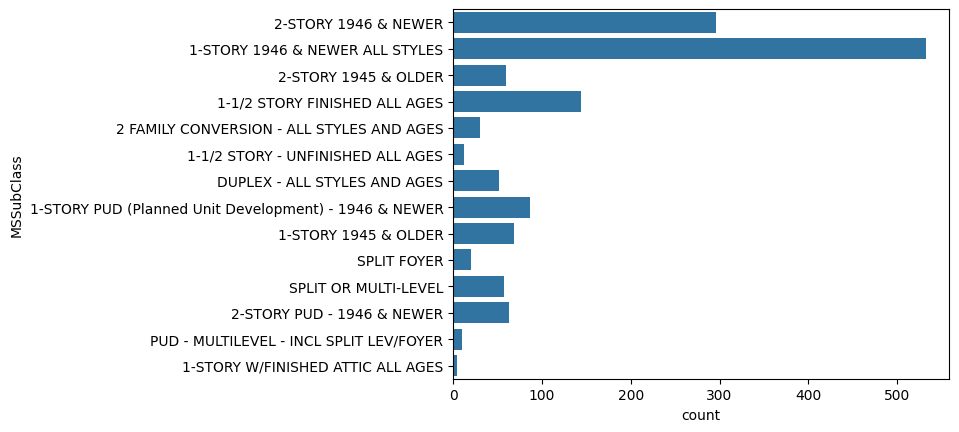

In [516]:
sns.countplot(data["MSSubClass"])
plt.show()

- We have more 1 and 2 story newer and newer all styles in high quantity

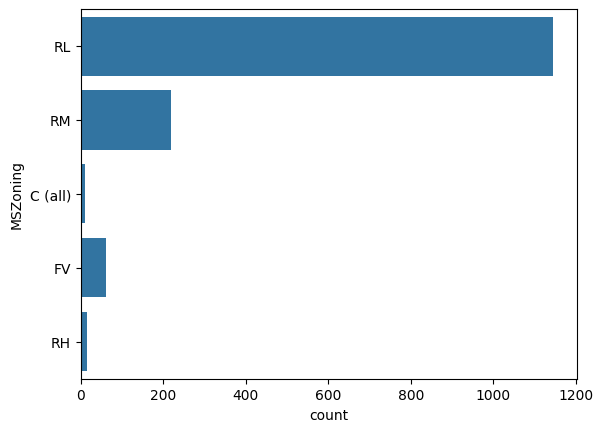

In [517]:
sns.countplot(data["MSZoning"])
plt.show()

- The zoning of the sale is residential with low density and medium density is more

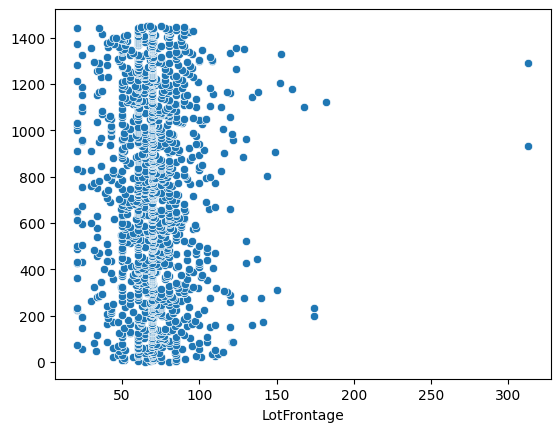

In [518]:
sns.scatterplot(data=data,x='LotFrontage',y=np.arange(len(data)))
plt.show()

In [519]:
data['LotFrontage'].describe()

count    1451.000000
mean       69.845624
std        22.044429
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

- We can see that mostly the LotFrontage is in a range upto 100
- And we have seen that there are not heavy outliers

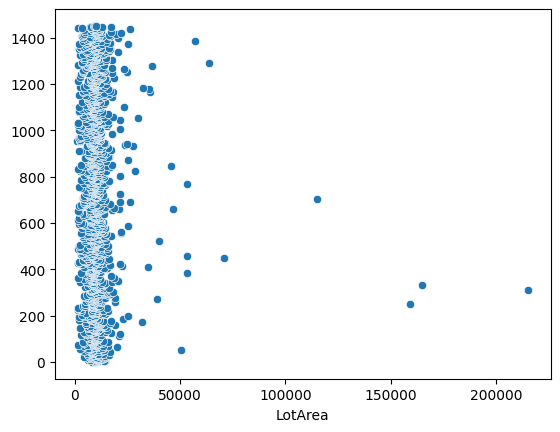

In [520]:
sns.scatterplot(data=data,x='LotArea',y=np.arange(len(data)))
plt.show()

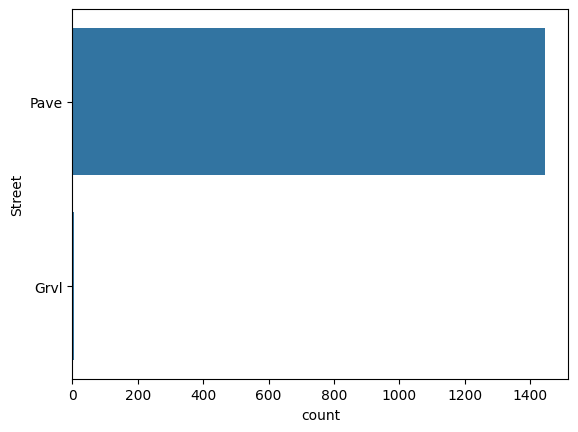

In [521]:
sns.countplot(data['Street'])
plt.show()

- We can see most of the properties have Paved street

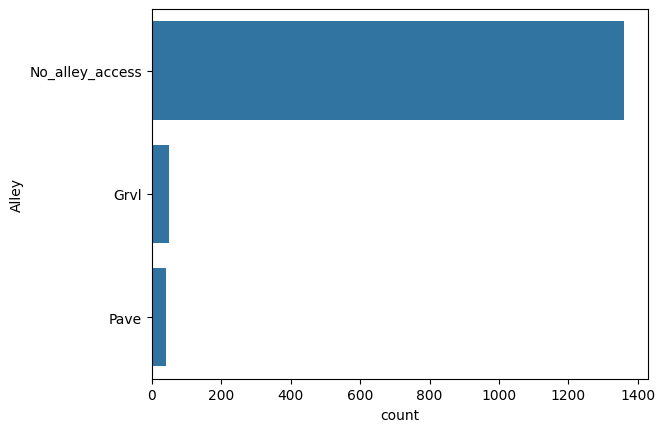

In [522]:
sns.countplot(data['Alley'])
plt.show()

- Most of the properties have no alley access

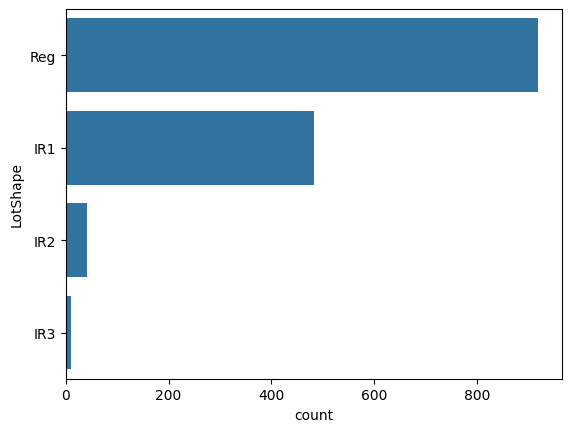

In [523]:
sns.countplot(data['LotShape'])
plt.show()

- We mostly have properties with regular and slightly irregular shape

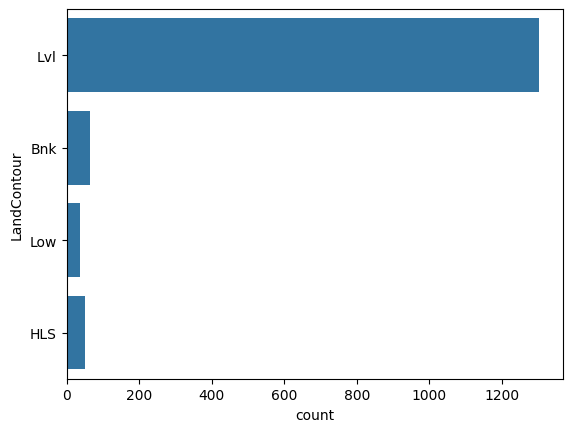

In [524]:
sns.countplot(data['LandContour'])
plt.show()

- Most of the properties are with flat landscape

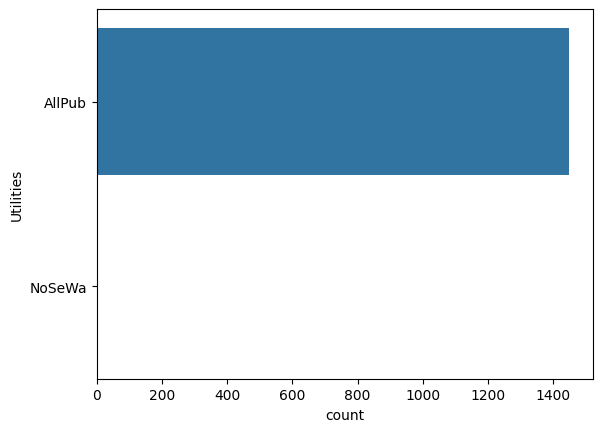

In [525]:
sns.countplot(data['Utilities'])
plt.show()

- We have properties with all the utilities

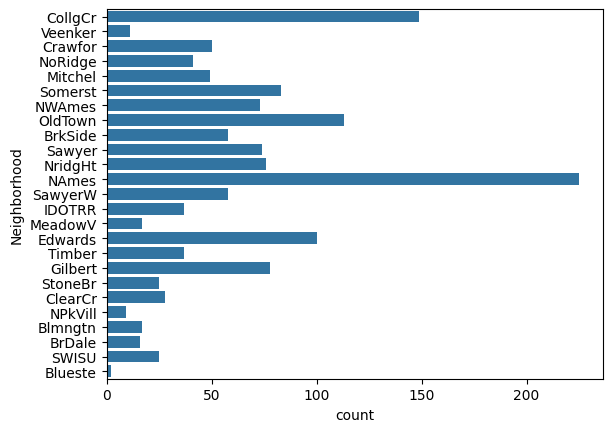

In [526]:
sns.countplot(data['Neighborhood'])
plt.show()

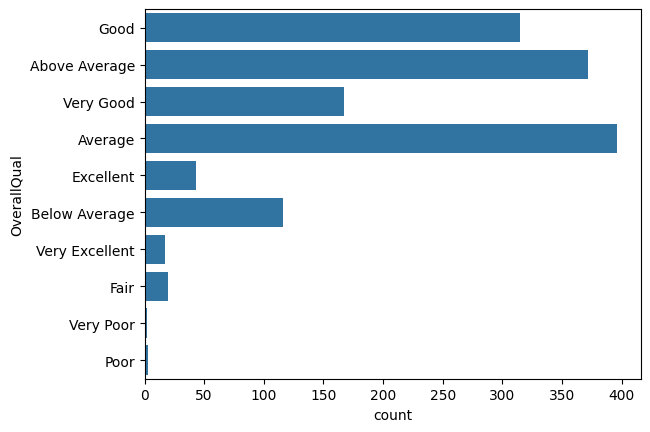

In [527]:
sns.countplot(data["OverallQual"])
plt.show()

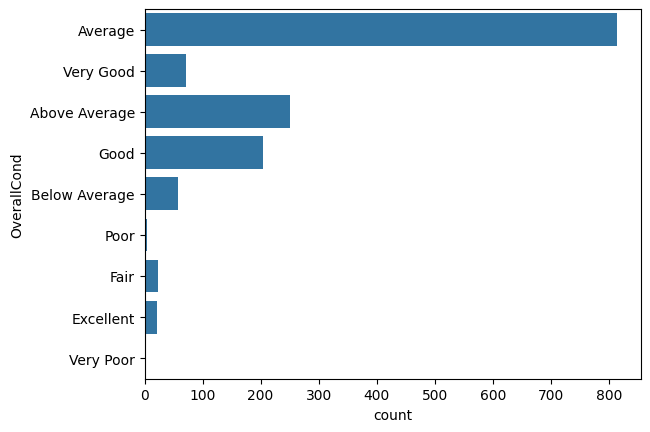

In [528]:
sns.countplot(data["OverallCond"])
plt.show()

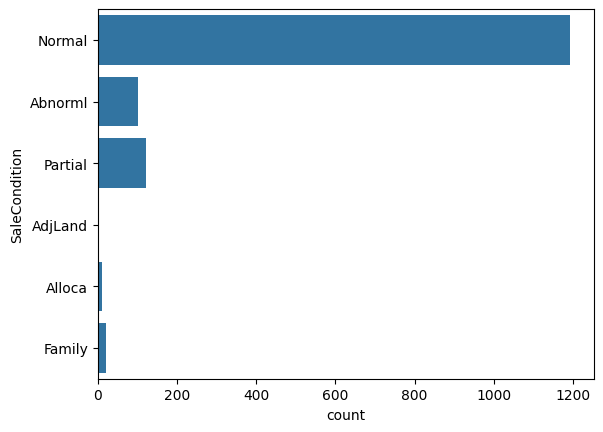

In [529]:
sns.countplot(data["SaleCondition"])
plt.show()

### Multivariate/Bivariate Analysis

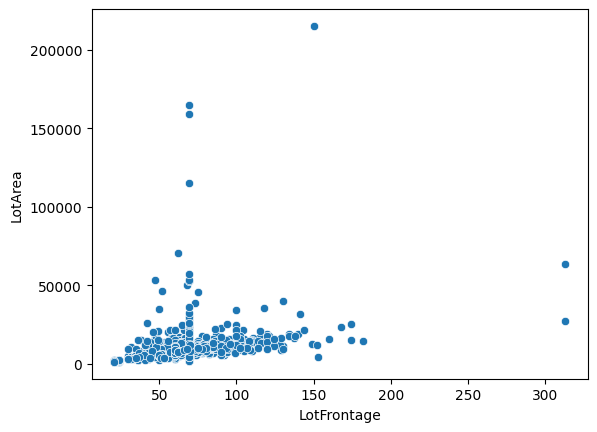

In [530]:
sns.scatterplot(data=data,x='LotFrontage',y='LotArea')
plt.show()

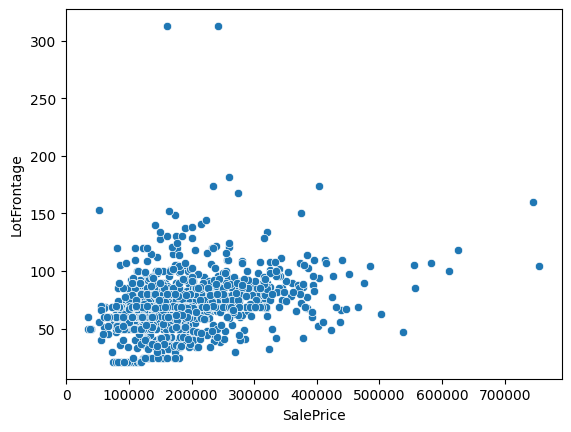

In [531]:
sns.scatterplot(data=data,x='SalePrice',y='LotFrontage')
plt.show()

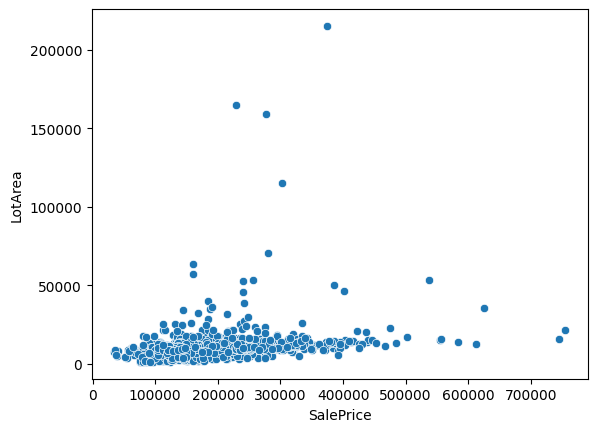

In [532]:
sns.scatterplot(data=data,x='SalePrice',y='LotArea')
plt.show()

In [533]:
avg_sale_month = data.groupby(['MoSold']).mean("SalePrice")["SalePrice"].reset_index().sort_values(by='MoSold',ascending=False)

In [534]:
avg_sale_month

,MoSold,SalePrice
11,12,186596.879310
10,11,192112.333333
9,10,179563.977528
8,9,191339.387097
7,8,184649.776860
6,7,186331.192308
5,6,177395.735178
4,5,171943.945274
3,4,171503.262411
2,3,182570.115385


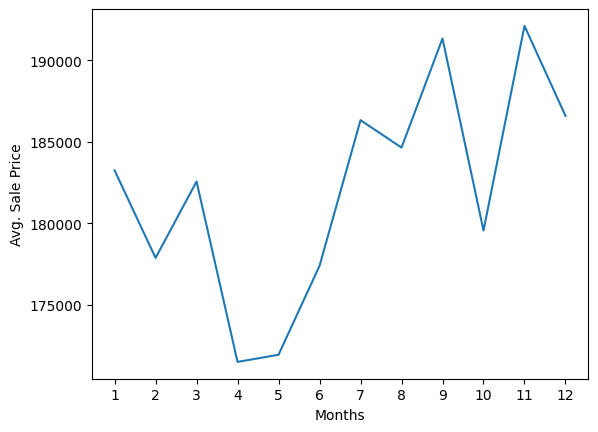

In [535]:
sns.lineplot(data=avg_sale_month,x='MoSold',y='SalePrice')
plt.xticks([i for i in range(1,13)])
plt.xlabel("Months")
plt.ylabel("Avg. Sale Price")
plt.show()

From 5th month to 9th month we can see the average prices of the properties go up

In [536]:
avg_sale_OverallQual = data.groupby(['OverallQual']).mean('SalePrice')['SalePrice'].reset_index()

In [537]:
avg_sale_OverallQual

,OverallQual,SalePrice
0,Above Average,161350.567204
1,Average,133437.547980
2,Below Average,108420.655172
3,Excellent,367513.023256
4,Fair,87473.750000
5,Good,207900.917460
6,Poor,51770.333333
7,Very Excellent,437034.764706
8,Very Good,274961.497006
9,Very Poor,50150.000000


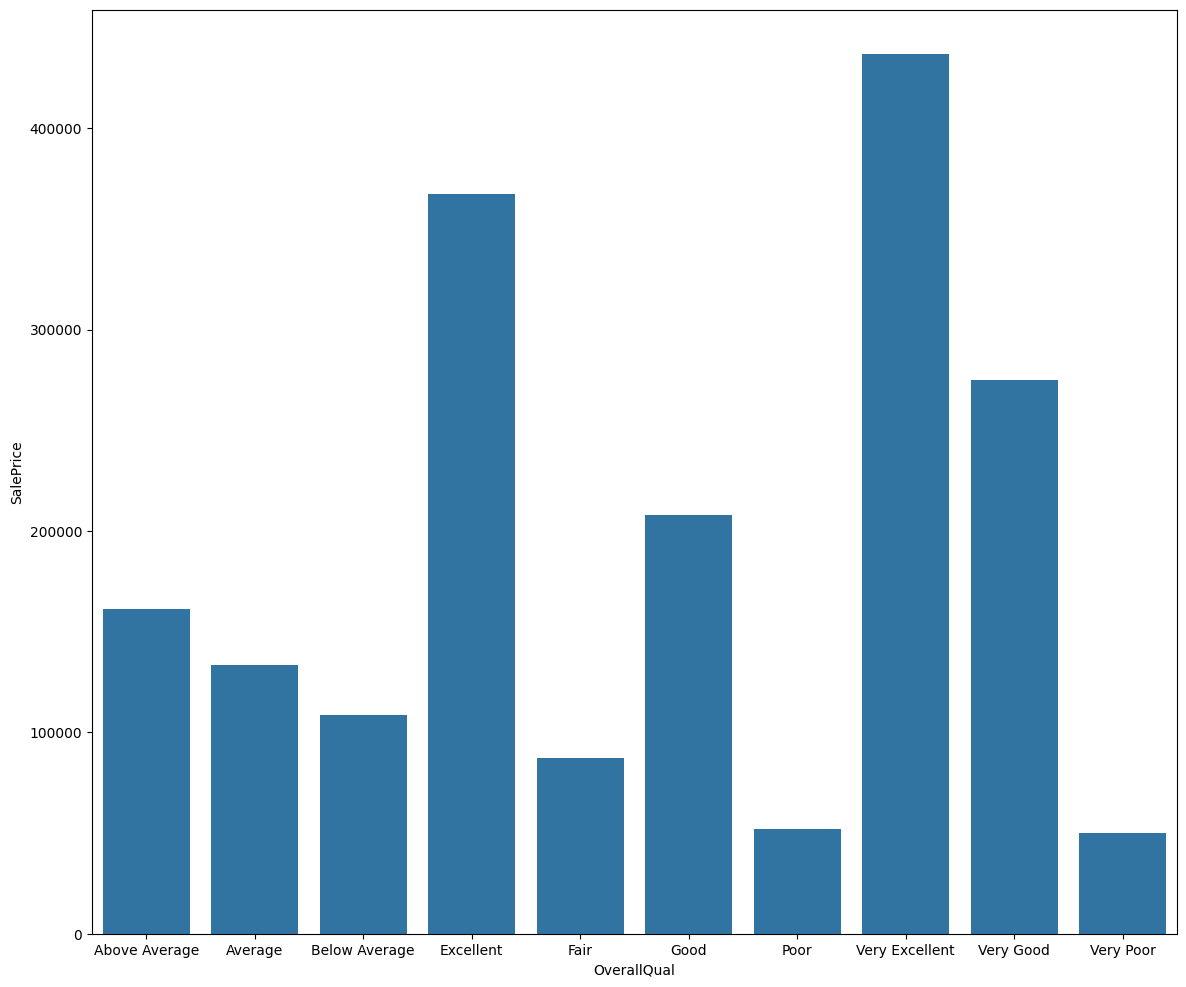

In [538]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_OverallQual,x='OverallQual',y='SalePrice',errorbar=None)
plt.show()

We can clearly see overall quality [(Rates the overall material and finish of the house)] of the property has a very significant impact on the price of the property

In [539]:
avg_sale_OverallCond = data.groupby(['OverallCond']).mean('SalePrice')['SalePrice'].reset_index()

In [540]:
avg_sale_OverallCond

,OverallCond,SalePrice
0,Above Average,153754.466135
1,Average,202863.411548
2,Below Average,120438.438596
3,Excellent,216004.545455
4,Fair,97817.125000
5,Good,158145.487805
6,Poor,141986.400000
7,Very Good,155651.736111
8,Very Poor,61000.000000


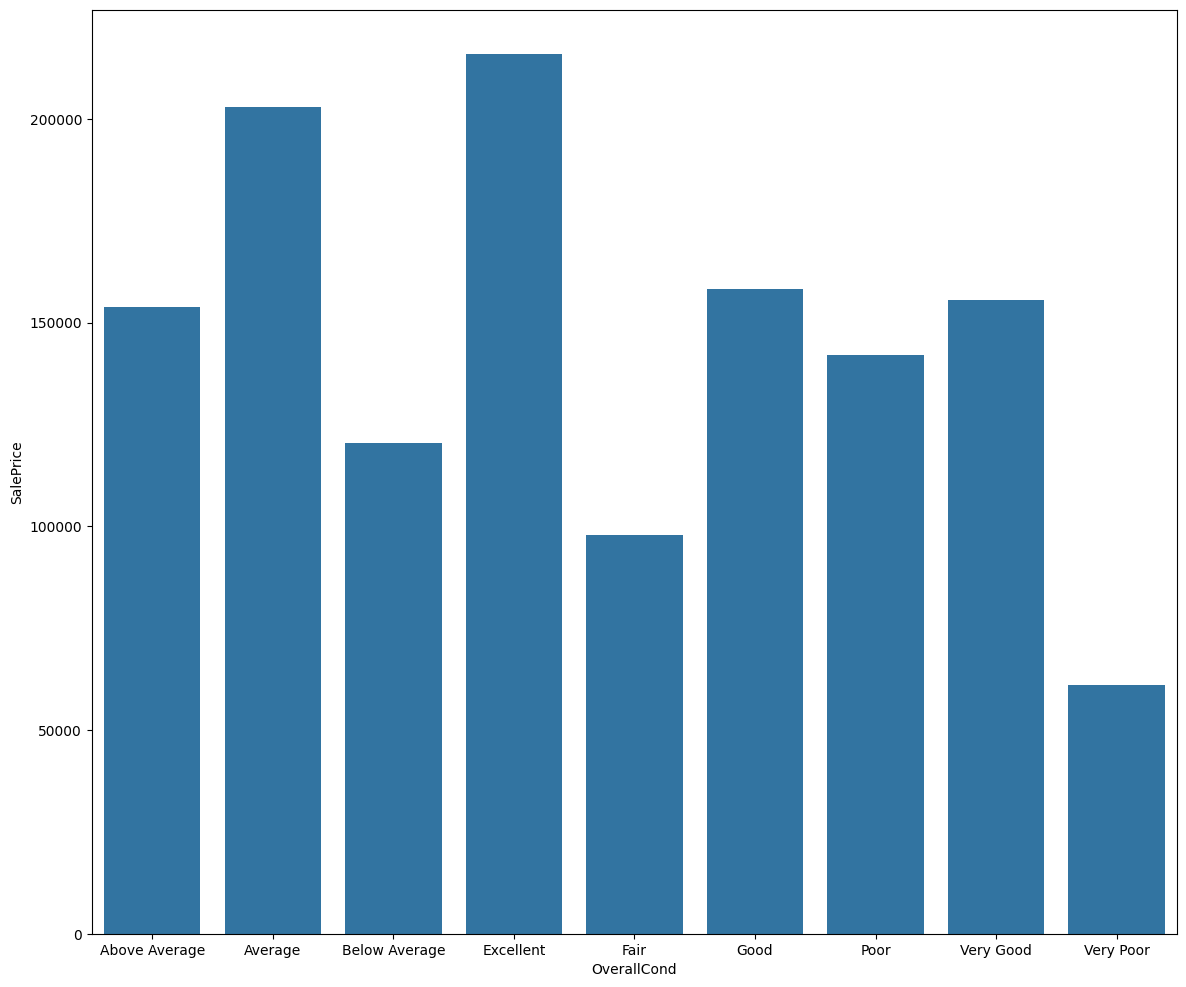

In [541]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_OverallCond,x='OverallCond',y='SalePrice',errorbar=None)
plt.show()

But on the other hand we can see that if overall condition (Rates the overall condition of the house) is excellent then it has higher sale price but also average condition or even poor condition has a good average sale price

In [542]:
avg_sale_RoofStyle = data.groupby(['RoofStyle']).mean('SalePrice')['SalePrice'].reset_index()

In [543]:
avg_sale_RoofStyle

,RoofStyle,SalePrice
0,Flat,194690.000000
1,Gable,171054.231244
2,Gambrel,148909.090909
3,Hip,218940.978947
4,Mansard,180568.428571
5,Shed,225000.000000


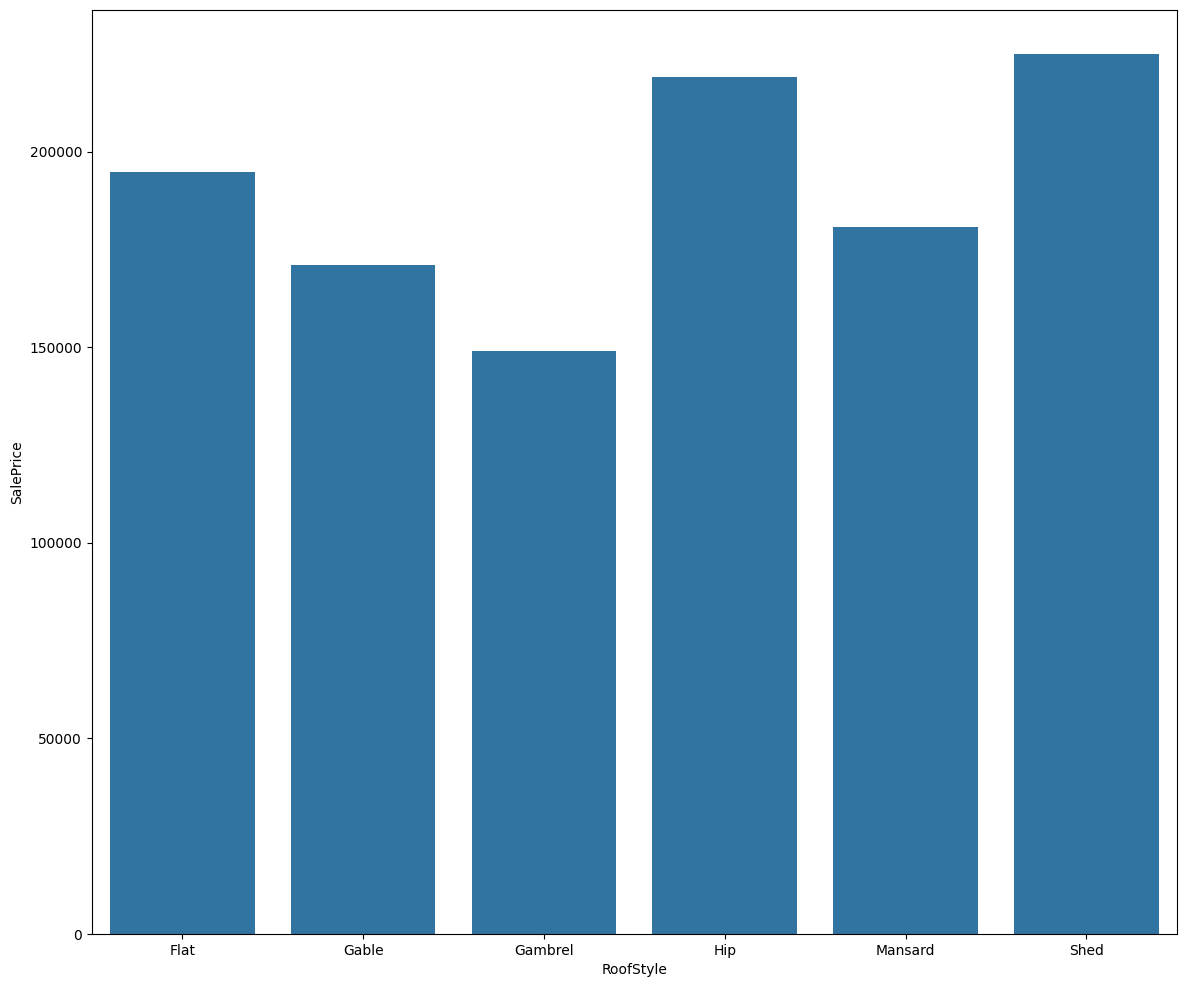

In [544]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_RoofStyle,x='RoofStyle',y='SalePrice',errorbar=None)
plt.show()

RoofStyle is not showing a clear pattern of properties sold more at a greater price. But a property with shed or hip has a little higher chance of being sold at a greater price.

In [545]:
avg_sale_Foundation = data.groupby(['Foundation']).mean('SalePrice')['SalePrice'].reset_index()

In [546]:
avg_sale_Foundation

,Foundation,SalePrice
0,BrkTil,132291.075342
1,CBlock,149805.714511
2,PConc,225179.815047
3,Slab,107365.625000
4,Stone,165959.166667
5,Wood,185666.666667


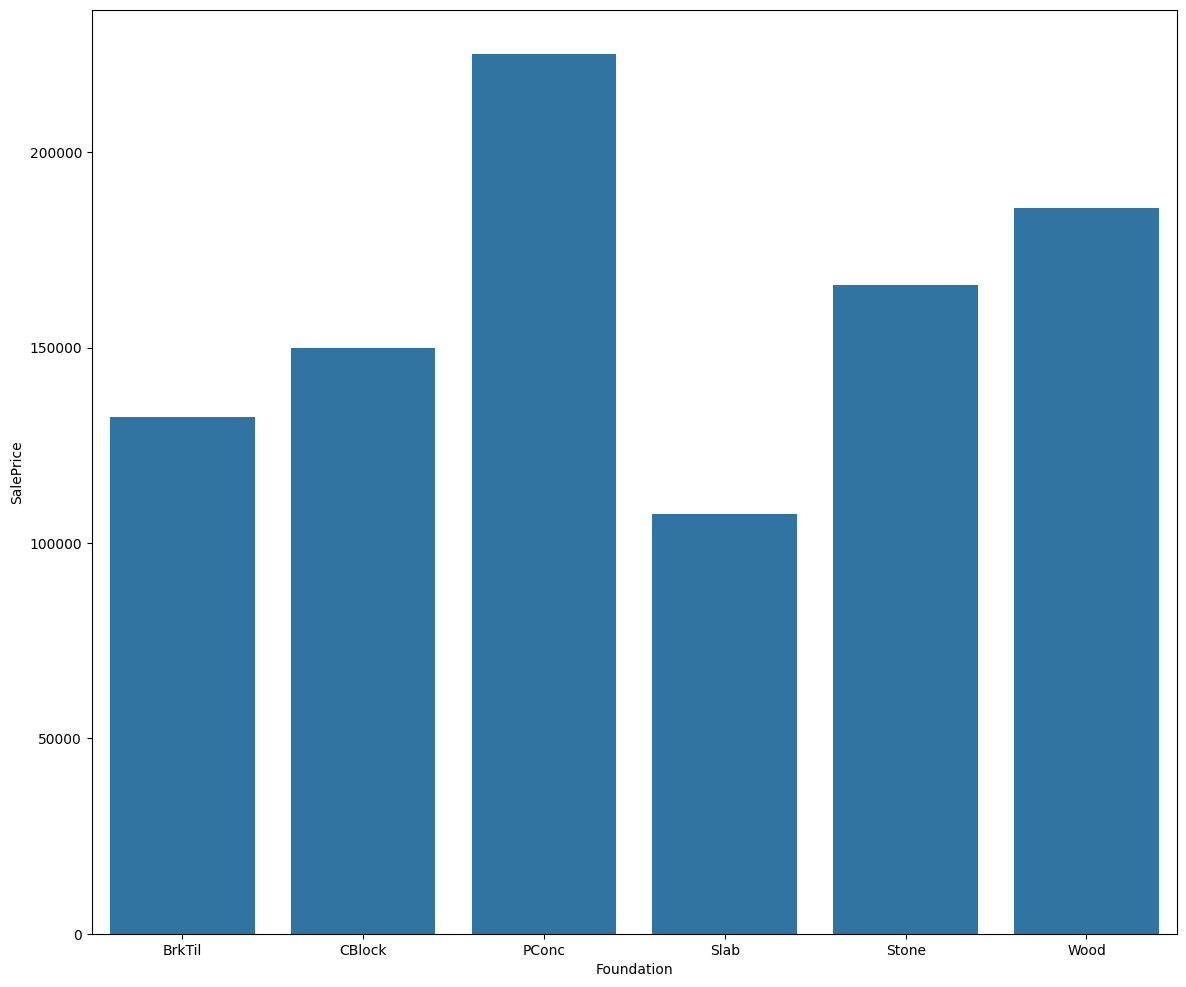

In [547]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_Foundation,x='Foundation',y='SalePrice',errorbar=None)
plt.show()

The properties with PConc (Poured Contrete) have higher value.

In [548]:
avg_sale_BsmtQual = data.groupby(['BsmtQual']).mean('SalePrice')['SalePrice'].reset_index()

In [549]:
avg_sale_BsmtQual

,BsmtQual,SalePrice
0,Ex,325891.383333
1,Fa,115692.028571
2,Gd,202729.509002
3,No_Basement,105652.891892
4,TA,140667.435185


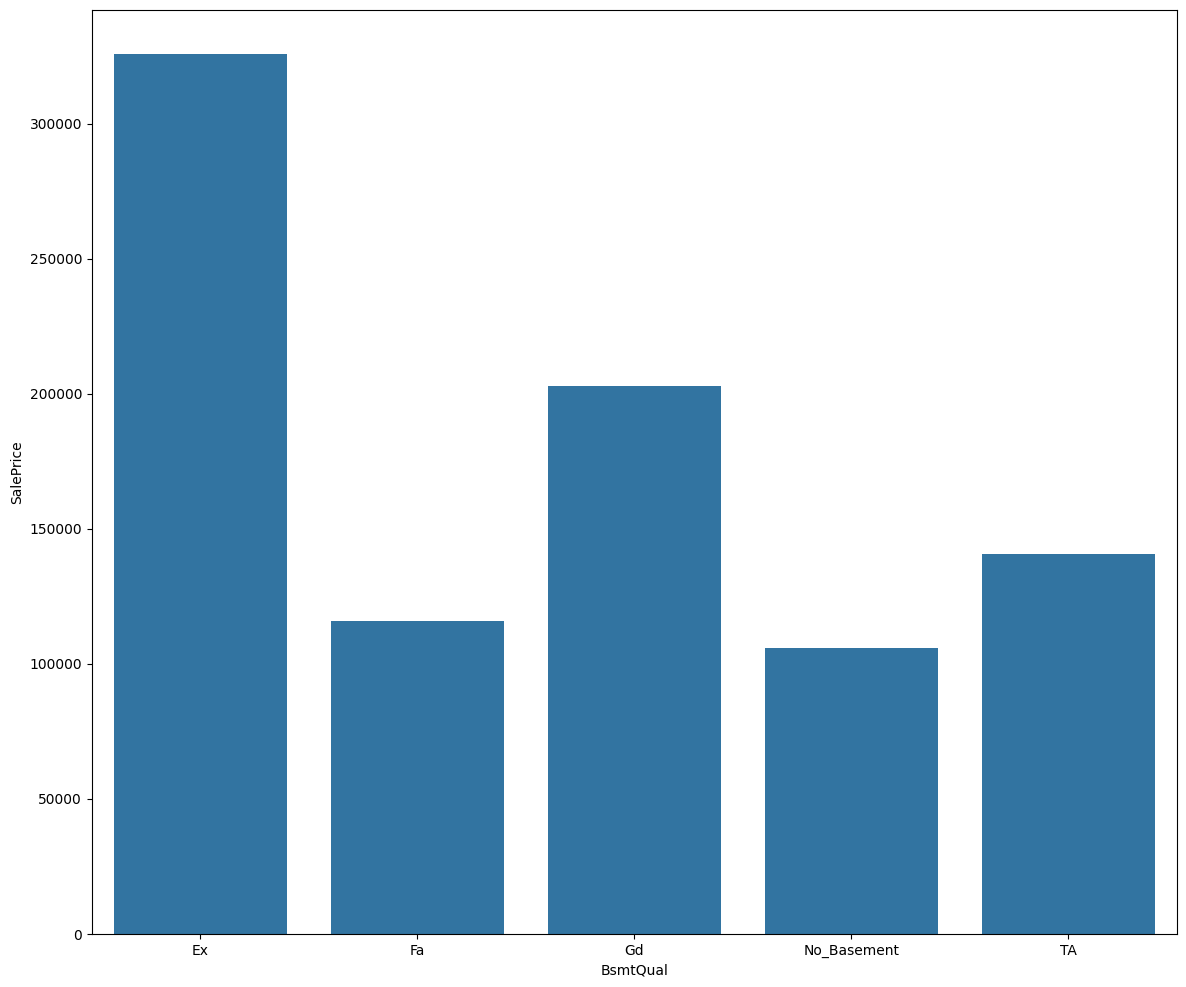

In [550]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_BsmtQual,x='BsmtQual',y='SalePrice',errorbar=None)
plt.show()

- Basement height which is more than 100+ inches which is Ex (Excellent) has a significant impact on the sale price.

In [551]:
avg_sale_BsmtCond = data.groupby(['BsmtCond']).mean('SalePrice')['SalePrice'].reset_index()

In [552]:
avg_sale_BsmtCond

,BsmtCond,SalePrice
0,Fa,121809.533333
1,Gd,209671.781250
2,No_Basement,105652.891892
3,Po,64000.000000
4,TA,183536.448196


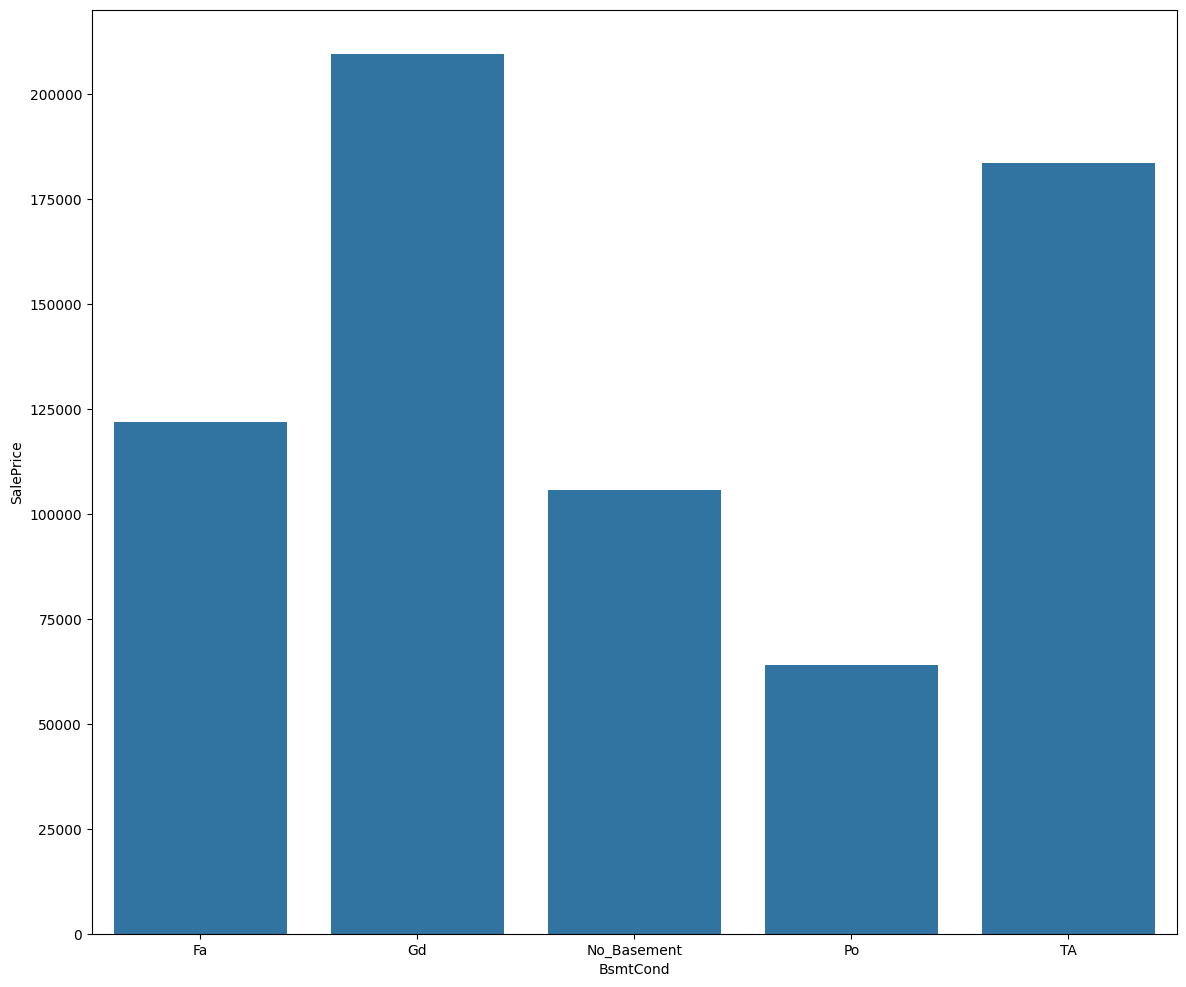

In [553]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_BsmtCond,x='BsmtCond',y='SalePrice',errorbar=None)
plt.show()

- Basement condition to be good and also okay if slightly damped still gives a good sale price.

In [554]:
avg_sale_SaleType = data.groupby(['SaleType']).mean('SalePrice')['SalePrice'].reset_index()

In [555]:
avg_sale_SaleType

,SaleType,SalePrice
0,COD,143973.255814
1,CWD,210600.000000
2,Con,269600.000000
3,ConLD,138780.888889
4,ConLI,200390.000000
5,ConLw,143700.000000
6,New,274760.008403
7,Oth,119850.000000
8,WD,173265.386994


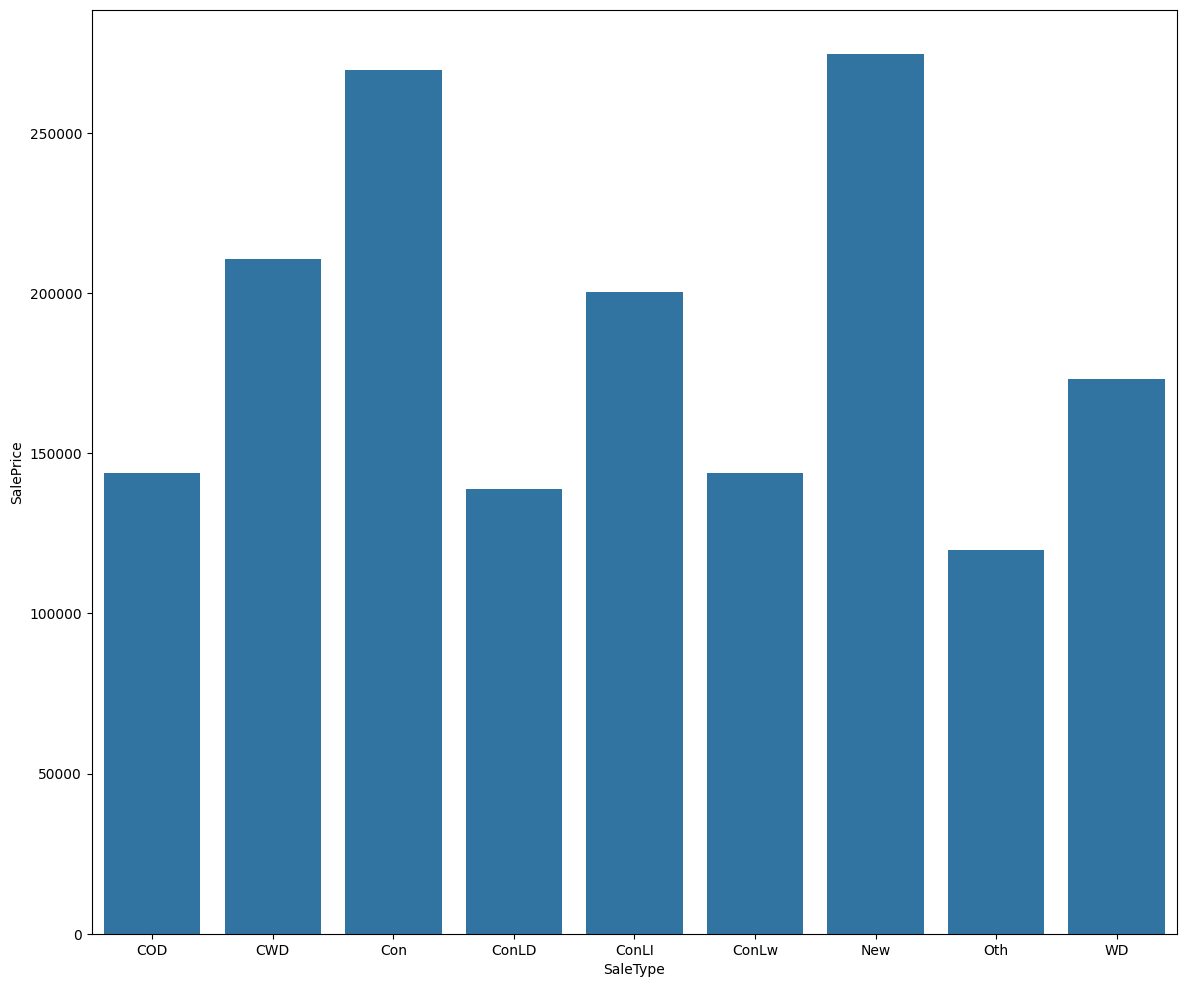

In [556]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_SaleType,x='SaleType',y='SalePrice',errorbar=None)
plt.show()

- Newly constructed homes or contract 15% downpayment with regular terms gives good sale price for the property.

In [557]:
avg_sale_SaleCondition = data.groupby(['SaleCondition']).mean('SalePrice')['SalePrice'].reset_index()

In [558]:
avg_sale_SaleCondition

,SaleCondition,SalePrice
0,Abnorml,146526.623762
1,AdjLand,104125.000000
2,Alloca,164355.000000
3,Family,149600.000000
4,Normal,175088.356245
5,Partial,272045.647541


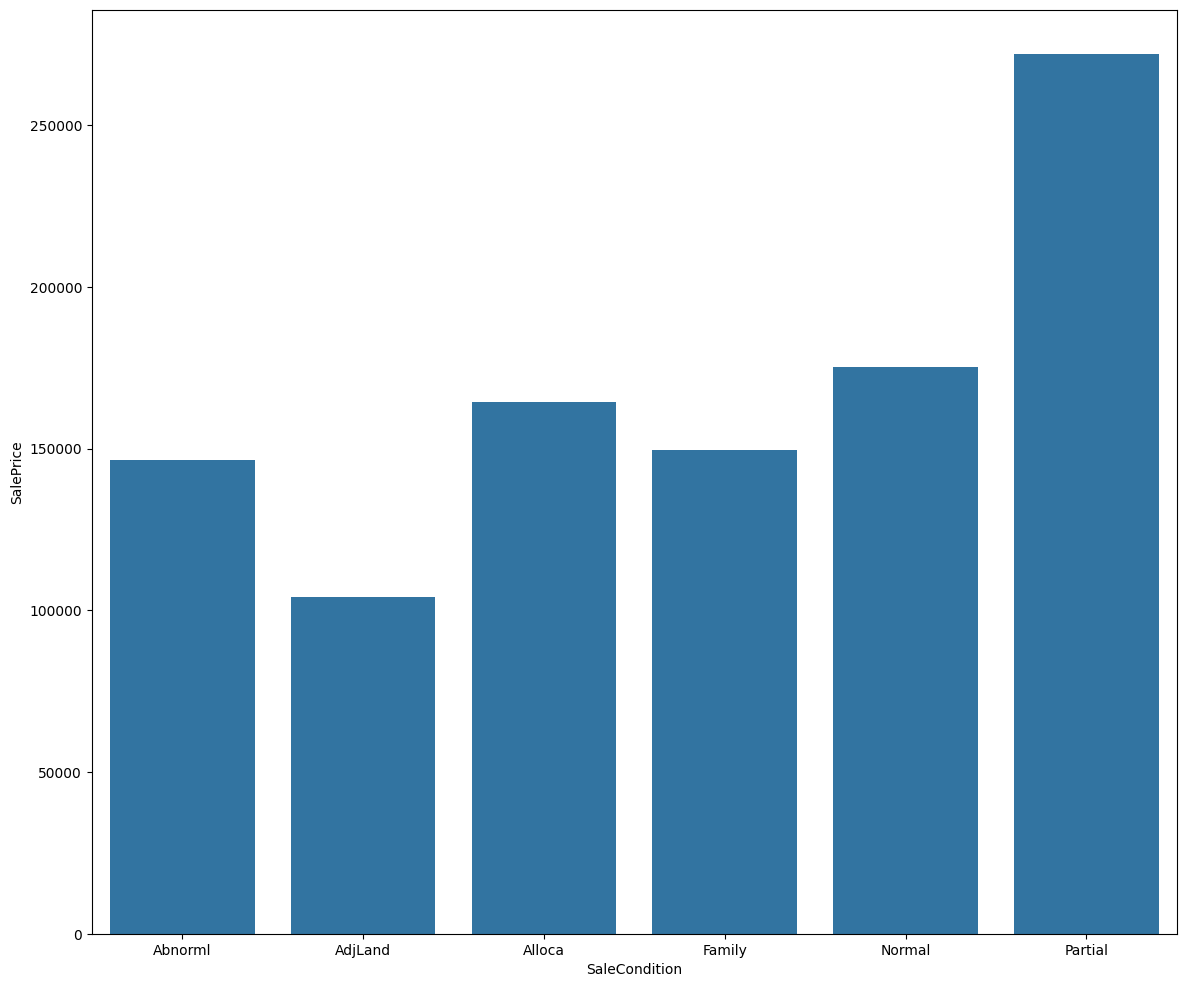

In [559]:
plt.figure(figsize=(14,12))
sns.barplot(data=avg_sale_SaleCondition,x='SaleCondition',y='SalePrice',errorbar=None)
plt.show()

- Sale price seemed on the higher side when the home was not even fully constructed.

## Deriving Features

In [560]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

#### Prev_Remodelling done before how many years

In [561]:
data["Prev_Remodelling_Done(Years)"] = pd.to_datetime(data['YearRemodAdd'],format="%Y").dt.year - pd.to_datetime(data['YearBuilt'],format="%Y").dt.year

In [562]:
data['Prev_Remodelling_Done(Years)']

0        0
1        0
2        1
3       55
4        0
        ..
1455     1
1456    10
1457    65
1458    46
1459     0
Name: Prev_Remodelling_Done(Years), Length: 1451, dtype: int32

In [563]:
data["Selling_After(Years)"] = pd.to_datetime(data['YrSold'],format="%Y").dt.year - pd.to_datetime(data['YearBuilt'],format="%Y").dt.year

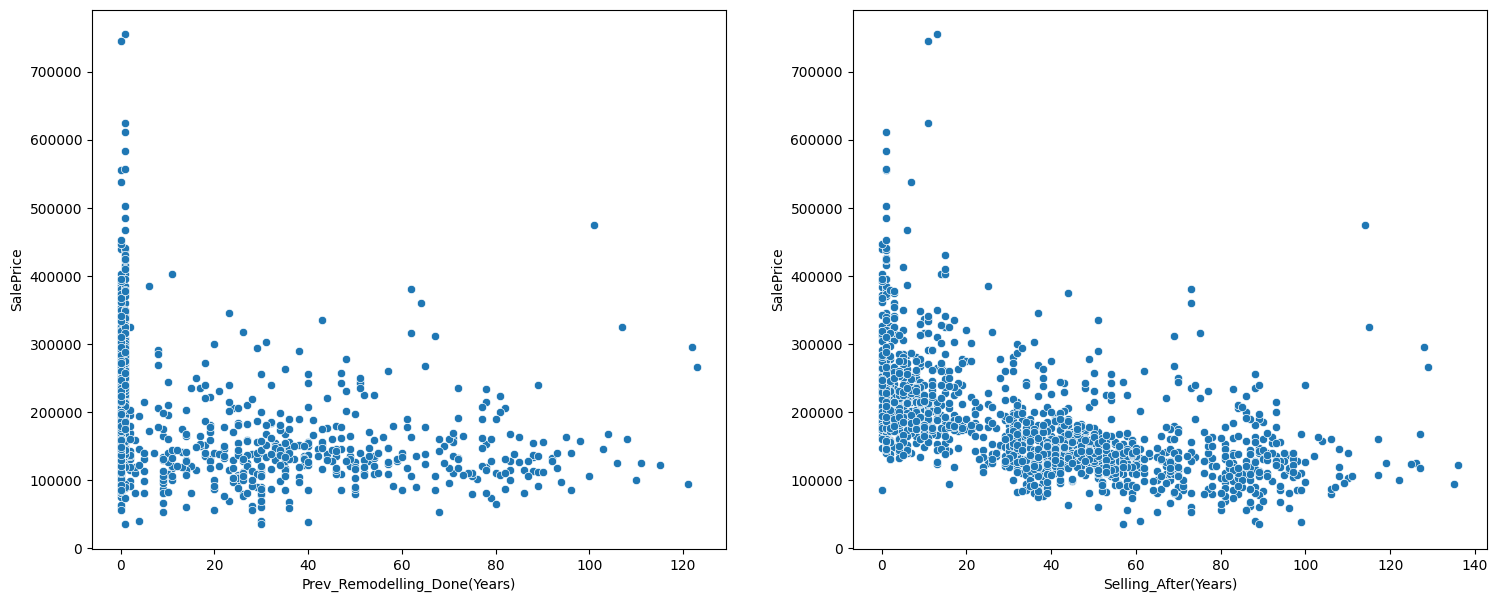

In [564]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='Prev_Remodelling_Done(Years)',y='SalePrice')
plt.subplot(1,2,2)
sns.scatterplot(data=data,x='Selling_After(Years)',y='SalePrice')
plt.show()

In [565]:
data = drop_cols(data,['YearRemodAdd','YearBuilt','YrSold'])

Number of cols before dropping: 78
Number of cols after dropping: 75


## Splitting the Data And Preprocessing

In [566]:
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

In [567]:
data = pd.get_dummies(data,columns=cat_cols,dtype='int',drop_first=True)

In [568]:
from sklearn.model_selection import train_test_split

In [569]:
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 42)

In [570]:
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Prev_Remodelling_Done(Years)',
       'Selling_After(Years)']

In [571]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [572]:
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [573]:
df_train.shape

(1160, 274)

In [574]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [575]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [576]:
X_train

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1295,70.0,8400,168.0,1016,0,36,1052,1052,0,0,...,0,0,0,0,1,0,0,0,1,0
1041,69.0,9130,252.0,400,64,336,800,800,832,0,...,0,0,0,0,1,0,0,0,1,0
417,86.0,22420,0.0,1128,0,242,1370,1370,1254,0,...,0,0,0,0,1,0,0,0,1,0
1172,35.0,4017,0.0,0,0,625,625,625,625,0,...,0,0,0,0,1,0,0,0,1,0
86,122.0,11911,0.0,0,0,684,684,684,876,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,61.0,9758,0.0,412,287,251,950,950,0,0,...,0,0,0,0,1,0,0,0,1,0
1136,80.0,9600,0.0,280,0,752,1032,1032,220,0,...,0,0,0,0,1,0,0,0,0,0
1302,92.0,10120,391.0,740,0,425,1165,1203,1323,0,...,0,0,0,0,1,0,0,0,1,0
863,70.0,7931,0.0,1148,0,0,1148,1148,0,0,...,0,0,0,0,1,0,0,0,1,0


In [577]:
X_test

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
540,85.0,14601,584.0,1260,0,578,1838,1838,0,0,...,0,0,0,0,1,0,0,0,1,0
757,69.0,11616,328.0,438,0,234,672,672,714,0,...,0,0,0,0,1,0,0,0,0,0
49,66.0,7742,0.0,763,0,192,955,955,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,0,0,0,0,1,0,0,0,1,0
141,78.0,11645,0.0,1300,0,434,1734,1734,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,60.0,8072,0.0,746,0,244,990,990,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,69.0,7500,0.0,547,0,224,771,753,741,0,...,0,0,0,0,1,0,0,0,1,0
717,80.0,10000,0.0,1084,0,92,1176,1178,0,0,...,0,0,0,0,1,0,0,0,1,0
255,66.0,8738,302.0,0,0,975,975,1005,1286,0,...,0,0,0,0,1,0,0,0,1,0


In [578]:
y_train

1295    138500
1041    173000
417     239000
1172    171900
86      174000
         ...  
1101    119500
1136    119000
1302    290000
863     132500
1132    117500
Name: SalePrice, Length: 1160, dtype: int64

In [579]:
y_test

540     315000
757     158900
49      127000
1456    210000
141     260000
         ...  
1307    138000
1301    177500
717     157000
255     230000
1310    335000
Name: SalePrice, Length: 291, dtype: int64

In [580]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

In [581]:
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# rfe = RFE(estimator=lm, n_features_to_select= 20 )
# rfe = rfe.fit(X_train, y_train)

In [582]:
# list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [583]:
# col = X_train.columns[rfe.support_]
# col

In [584]:
# X_train.columns[~rfe.support_]

In [585]:
# # Creating X_test dataframe with RFE selected variables
# X_train_rfe = X_train[col]

In [586]:
# X_train_rfe

In [587]:
# X_train_rfe.columns

### Model 1

In [588]:
# # Adding a constant variable 
# import statsmodels.api as sm  
# X_train_rfe = sm.add_constant(X_train_rfe)

In [589]:
# lm = sm.OLS(y_train,X_train_rfe).fit()

In [590]:
# #Let's see the summary of our linear model
# print(lm.summary())

In [591]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = pd.DataFrame()
# X = X_train_rfe
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

In [592]:
# X_train_rfe = drop_cols(X_train_rfe,['RoofMatl_CompShg'])

### Model 2

In [593]:
# X_train_new = X_train_rfe

In [594]:
# X_train_lm = sm.add_constant(X_train_new)

In [595]:
# lm = sm.OLS(y_train,X_train_lm).fit()

In [596]:
# #Let's see the summary of our linear model
# print(lm.summary())

In [597]:
# vif = pd.DataFrame()
# X = X_train_new
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

## Using Normal Linear Regression

In [598]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [599]:
scaler = MinMaxScaler()
linear_rg = LinearRegression()
linear_rg_pipline = make_pipeline(scaler,PolynomialFeatures(degree=2),linear_rg)

In [600]:
X_train

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1295,70.0,8400,168.0,1016,0,36,1052,1052,0,0,...,0,0,0,0,1,0,0,0,1,0
1041,69.0,9130,252.0,400,64,336,800,800,832,0,...,0,0,0,0,1,0,0,0,1,0
417,86.0,22420,0.0,1128,0,242,1370,1370,1254,0,...,0,0,0,0,1,0,0,0,1,0
1172,35.0,4017,0.0,0,0,625,625,625,625,0,...,0,0,0,0,1,0,0,0,1,0
86,122.0,11911,0.0,0,0,684,684,684,876,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,61.0,9758,0.0,412,287,251,950,950,0,0,...,0,0,0,0,1,0,0,0,1,0
1136,80.0,9600,0.0,280,0,752,1032,1032,220,0,...,0,0,0,0,1,0,0,0,0,0
1302,92.0,10120,391.0,740,0,425,1165,1203,1323,0,...,0,0,0,0,1,0,0,0,1,0
863,70.0,7931,0.0,1148,0,0,1148,1148,0,0,...,0,0,0,0,1,0,0,0,1,0


In [601]:
# X_train_new = drop_cols(X_train_new,'const')

In [602]:
linear_rg_pipline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [603]:
y_pred_linear_reg_train = linear_rg_pipline.predict(X_train)

In [604]:
# X_test_new = X_test[X_train.columns]

In [605]:
y_pred_linear_reg_test = linear_rg_pipline.predict(X_test)

In [606]:
r2_linear_reg_train  = r2_score(y_train,y_pred_linear_reg_train)
r2_linear_reg_test  = r2_score(y_test,y_pred_linear_reg_test)

In [607]:
print(f"R2 score for train: {r2_linear_reg_train}")
print(f"R2 score for test: {r2_linear_reg_test}")

R2 score for train: 1.0
R2 score for test: 0.863881412578372


- We can see that the model is heavily overfitting lets fix that

## Ridge Regression

In [608]:
scaler = MinMaxScaler()
ridge_rg = Ridge(alpha=175)
ridge_rg_pipline = make_pipeline(scaler,PolynomialFeatures(degree=2),ridge_rg)

In [609]:
ridge_rg_pipline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=175))])

In [610]:
y_pred_ridge_reg_train = ridge_rg_pipline.predict(X_train)

In [611]:
y_pred_ridge_reg_test = ridge_rg_pipline.predict(X_test)

In [612]:
r2_ridge_reg_train  = r2_score(y_train,y_pred_ridge_reg_train)
r2_ridge_reg_test  = r2_score(y_test,y_pred_ridge_reg_test)

In [613]:
print(f"R2 score for train: {r2_ridge_reg_train}")
print(f"R2 score for test: {r2_ridge_reg_test}")

R2 score for train: 0.9484020369055663
R2 score for test: 0.9000794040670077


## Lasso Regression

In [614]:
scaler = MinMaxScaler()
lasso_rg = Lasso(alpha=700) # 0.0001,0.00011
lasso_rg_pipline = make_pipeline(scaler,PolynomialFeatures(degree=2),lasso_rg)

In [615]:
lasso_rg_pipline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=700))])

In [616]:
y_pred_lasso_reg_train = lasso_rg_pipline.predict(X_train)
y_pred_lasso_reg_test = lasso_rg_pipline.predict(X_test)

In [617]:
r2_lasso_reg_train  = r2_score(y_train,y_pred_lasso_reg_train)
r2_lasso_reg_test  = r2_score(y_test,y_pred_lasso_reg_test)

In [618]:
print(f"R2 score for train: {r2_lasso_reg_train}")
print(f"R2 score for test: {r2_lasso_reg_test}")

R2 score for train: 0.872252680958753
R2 score for test: 0.873599450580327


## Cross Validation

In [619]:
from sklearn.model_selection import cross_val_score

cv_scores_ridge = cross_val_score(ridge_rg_pipline,X_train,y_train,cv=5,scoring='r2')
cv_scores_ridge,np.std(cv_scores_ridge)

(array([0.51460815, 0.8127259 , 0.84119662, 0.87880531, 0.91038285]),
 0.14236904778644852)

In [620]:
cv_scores_lasso = cross_val_score(lasso_rg_pipline,X_train,y_train,cv=5,scoring='r2')
cv_scores_lasso,np.std(cv_scores_lasso)

(array([0.5292357 , 0.82742695, 0.80612229, 0.8437386 , 0.85698019]),
 0.12291182662913339)